# Deep Learning Tutorial

In this tutorial we will demonstrate how to create a basic deep learning model using train, test, and validation sets. For the model a subset of the bladderpdo dataset is used where transcriptomics and drug structures are the inputs and drug response values are the output. Throughout the tutorial we will be using functions included in coderdata. For more infomration on functions used from the package look to the [coderdata/API reference](../APIreference.html).

Import coderdata, pandas, and numpy.

In [1]:
import pandas as pd
import numpy as np
import coderdata as cd

## Download and View Datasets
To view the availabe datasets within the coderdata API use the following functions.

In [2]:
cd.list_datasets()

beataml: Beat acute myeloid leukemia (BeatAML) focuses on acute myeloid leukemia tumor data. Data includes drug response, proteomics, and transcriptomics datasets.
bladderpdo: Tumor Evolution and Drug Response in Patient-Derived Organoid Models of Bladder Cancer Data includes transcriptomics, mutations, copy number, and drug response data.
ccle: Cancer Cell Line Encyclopedia (CCLE).
cptac: The Clinical Proteomic Tumor Analysis Consortium (CPTAC) project is a collaborative network funded by the National Cancer Institute (NCI) focused on improving our understanding of cancer biology through the integration of transcriptomic, proteomic, and genomic data.
ctrpv2: Cancer Therapeutics Response Portal version 2 (CTRPv2)
fimm: Institute for Molecular Medicine Finland (FIMM) dataset.
gcsi: The Genentech Cell Line Screening Initiative (gCSI)
gdscv1: Genomics of Drug Sensitivity in Cancer (GDSC) v1
gdscv2: Genomics of Drug Sensitivity in Cancer (GDSC) v2
hcmi: Human Cancer Models Initiative (HCMI

To download and load the needed dataset(s) use the function below. For this example we will be using bladderpdo.

In [ ]:
cd.download("bladderpdo")

Example Output: \
Downloaded 'https://ndownloader.figshare.com/files/53779532' to 'c:\Path\genes.csv.gz'\
Downloaded 'https://ndownloader.figshare.com/files/53956211' to 'c:\Path\bladderpdo_copy_number.csv.gz'\
Downloaded 'https://ndownloader.figshare.com/files/53956214' to 'c:\Path\bladderpdo_drugs.tsv.gz'\
Downloaded 'https://ndownloader.figshare.com/files/53956217' to 'c:\Path\bladderpdo_drug_descriptors.tsv.gz\
Downloaded 'https://ndownloader.figshare.com/files/53956220' to 'c:\Path\bladderpdo_experiments.tsv.gz'\
Downloaded 'https://ndownloader.figshare.com/files/53956223' to 'c:\Path\bladderpdo_mutations.csv.gz'\
Downloaded 'https://ndownloader.figshare.com/files/53956226' to 'c:\Path\bladderpdo_samples.csv'\
Downloaded 'https://ndownloader.figshare.com/files/53956232' to 'c:\Path\bladderpdo_transcriptomics.csv.gz'

In [ ]:
bladderpdo=cd.load("bladderpdo")

Example Output: \
Importing raw data ...\
Importing 'copy_number' from c:\Path\bladderpdo_copy_number.csv.gz ... DONE\
Importing 'drugs' from c:\Path\bladderpdo_drugs.tsv.gz ... DONE\
Importing 'drug_descriptors' from c:\Path\bladderpdo_drug_descriptors.tsv.gz ... DONE\
Importing 'experiments' from c:\Path\bladderpdo_experiments.tsv.gz ... DONE\
Importing 'mutations' from c:\Path\bladderpdo_mutations.csv.gz ... DONE\
Importing 'samples' from c:\Path\bladderpdo_samples.csv ... DONE\
Importing 'transcriptomics' from c:\Path\bladderpdo_transcriptomics.csv.gz ... DONE\
Importing 'genes' from c:\Path\genes.csv.gz ... DONE\
Importing raw data ... DONE

The function `type()` can be used to view what the class of any object is as seen below, bladderpdo is a dataset. 

In [5]:
type(bladderpdo)

coderdata.dataset.dataset.Dataset

To view all the datatypes included with a dataset object use the function below. The `info()` command allows us to see which datatypes are included in the bladderpdo dataset object. We will be using the Transcriptomics, Drugs, and Experiments Data in our example. Note that each datatype has different format options and arguments. To view all options for each type navigate to the [usage](../usage.html).

In [6]:
pd.DataFrame({"datatypes":bladderpdo.types()})

,datatypes
0,transcriptomics
1,mutations
2,copy_number
3,samples
4,drugs
5,experiments
6,genes


Examples are shown below of how to view a regular dataset and the specificed datatype.

In [7]:
bladderpdo.drugs

,improve_drug_id,chem_name,pubchem_id,canSMILES,InChIKey,formula,weight
0,SMI_8294,bi-2536,11364421,CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C...,XQVVPGYIWAGRNI-JOCHJYFZSA-N,C28H39N7O3,521.7
1,SMI_8294,"((r)-4-[(8-cyclopentyl-7-et-5,6,7,8-tetrahydro...",11364421,CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C...,XQVVPGYIWAGRNI-JOCHJYFZSA-N,C28H39N7O3,521.7
2,SMI_8294,en300-18167228,11364421,CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C...,XQVVPGYIWAGRNI-JOCHJYFZSA-N,C28H39N7O3,521.7
3,SMI_8294,"4-((r)-8-cyclopentyl-7-ethyl-5-methyl-6-oxo-5,...",11364421,CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C...,XQVVPGYIWAGRNI-JOCHJYFZSA-N,C28H39N7O3,521.7
4,SMI_8294,bcpp000342,11364421,CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C...,XQVVPGYIWAGRNI-JOCHJYFZSA-N,C28H39N7O3,521.7
...,...,...,...,...,...,...,...
5015,SMI_438,metatrexan,126941,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,FBOZXECLQNJBKD-ZDUSSCGKSA-N,C20H22N8O5,454.4
5016,SMI_438,hms2233o18,126941,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,FBOZXECLQNJBKD-ZDUSSCGKSA-N,C20H22N8O5,454.4
5017,SMI_438,amethopterin l-,126941,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,FBOZXECLQNJBKD-ZDUSSCGKSA-N,C20H22N8O5,454.4
5018,SMI_438,tocris-1230,126941,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,FBOZXECLQNJBKD-ZDUSSCGKSA-N,C20H22N8O5,454.4


In [8]:
bladderpdo.transcriptomics

,entrez_id,transcriptomics,improve_sample_id,source,study
0,7105,69.277129,5553,Gene Expression Omnibus,Lee et al. 2018 Bladder PDOs
1,64102,0.027787,5553,Gene Expression Omnibus,Lee et al. 2018 Bladder PDOs
2,8813,81.403736,5553,Gene Expression Omnibus,Lee et al. 2018 Bladder PDOs
3,57147,20.024448,5553,Gene Expression Omnibus,Lee et al. 2018 Bladder PDOs
4,55732,29.819016,5553,Gene Expression Omnibus,Lee et al. 2018 Bladder PDOs
...,...,...,...,...,...
816096,140032,0.024479,5502,Gene Expression Omnibus,Lee et al. 2018 Bladder PDOs
816097,9782,44.949383,5502,Gene Expression Omnibus,Lee et al. 2018 Bladder PDOs
816098,102724737,0.024479,5502,Gene Expression Omnibus,Lee et al. 2018 Bladder PDOs
816099,101669762,2.203401,5502,Gene Expression Omnibus,Lee et al. 2018 Bladder PDOs


In [9]:
bladderpdo.experiments

,source,improve_sample_id,improve_drug_id,study,time,time_unit,dose_response_metric,dose_response_value
0,Synapse,5473,SMI_32023,Lee etal 2018 Bladder PDOs,6,days,fit_auc,0.7725
1,Synapse,5473,SMI_55473,Lee etal 2018 Bladder PDOs,6,days,fit_auc,0.9277
2,Synapse,5473,SMI_27249,Lee etal 2018 Bladder PDOs,6,days,fit_auc,0.8538
3,Synapse,5473,SMI_55606,Lee etal 2018 Bladder PDOs,6,days,fit_auc,0.8478
4,Synapse,5473,SMI_20004,Lee etal 2018 Bladder PDOs,6,days,fit_auc,0.8825
...,...,...,...,...,...,...,...,...
32995,Synapse,5606,SMI_438,Lee etal 2018 Bladder PDOs,6,days,dss,0.1221
32996,Synapse,5606,SMI_52219,Lee etal 2018 Bladder PDOs,6,days,dss,0.1104
32997,Synapse,5606,SMI_34999,Lee etal 2018 Bladder PDOs,6,days,dss,0.1202
32998,Synapse,5606,SMI_55689,Lee etal 2018 Bladder PDOs,6,days,dss,0.0000


Coderdata has a function `format()` that will reformat any dataset.datatype with the specificed arguments. Each datatype has different arguments specific to its contents and to view each datatypes argument options visit [coderdata/usage](../usage.html). Here we will use the bladderpdo.experiment to format. We want to only include *auc* metric values in our dataframe for this tutorial, however, to view other metric options for a dataset use the pandas unique function. 

In [10]:
pd.DataFrame({"dose_response_metric":bladderpdo.experiments.dose_response_metric.unique()})

,dose_response_metric
0,fit_auc
1,fit_ic50
2,fit_ec50
3,fit_r2
4,fit_ec50se
5,fit_einf
6,fit_hs
7,aac
8,auc
9,dss


Set `bladderpdo.experiments` to only include samples where the `dose_response_metric` is *auc*.

In [11]:
bladderpdo.experiments = bladderpdo.format(data_type='experiments', metrics='auc')
bladderpdo.experiments 

,source,improve_sample_id,improve_drug_id,study,time,time_unit,dose_response_metric,dose_response_value
26400,Synapse,5473,SMI_32023,Lee etal 2018 Bladder PDOs,6,days,auc,0.7530
26401,Synapse,5473,SMI_55473,Lee etal 2018 Bladder PDOs,6,days,auc,0.9067
26402,Synapse,5473,SMI_27249,Lee etal 2018 Bladder PDOs,6,days,auc,0.8972
26403,Synapse,5473,SMI_55606,Lee etal 2018 Bladder PDOs,6,days,auc,0.8320
26404,Synapse,5473,SMI_20004,Lee etal 2018 Bladder PDOs,6,days,auc,0.8937
...,...,...,...,...,...,...,...,...
29695,Synapse,5606,SMI_438,Lee etal 2018 Bladder PDOs,6,days,auc,0.4095
29696,Synapse,5606,SMI_52219,Lee etal 2018 Bladder PDOs,6,days,auc,0.6260
29697,Synapse,5606,SMI_34999,Lee etal 2018 Bladder PDOs,6,days,auc,0.8730
29698,Synapse,5606,SMI_55689,Lee etal 2018 Bladder PDOs,6,days,auc,0.9406


# Develop Deep Learning Model

We will be using the keras functional API, for information on the keras API visit [keras.io](https://keras.io/api). This allows us to use multiple inputs in our model. You may need to install a couple of these dependencies to proceed. \
Dependencies that are not included in coderdata:
- tensorflow (Note: tensorflow is only supported up to the python version 3.12)
- matplotlib
- rdkit

In [12]:
import keras
#from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from keras.models import Model
from keras.layers import Input, Dense, concatenate
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError
from keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Two-Way Split

Coderdata has 2 split functions a two-way and three-way split that can be used with any dataset. Below are example of how to use both functions but for this tutorial we will be using the three-way splits for our model.

**Quick tip:** To view all available arguments for any function use the `help()` function below.

In [13]:
help(bladderpdo.split_train_other)

Help on method split_train_other in module coderdata.dataset.dataset:

split_train_other(split_type: "Literal['mixed-set', 'drug-blind', 'cancer-blind']" = 'mixed-set', ratio: 'tuple[int, int]' = (8, 2), stratify_by: 'Optional[str]' = None, balance: 'bool' = False, random_state: 'Optional[Union[int, RandomState]]' = None, **kwargs: 'dict') -> 'TwoWaySplit' method of coderdata.dataset.dataset.Dataset instance



Here is an example of a two-way split that is trained on bladderpdo dataset dataframe. To view the definitions of different `split_type` and the associated arguments view the [API reference](../APIreference.html). Note that the other split functions will use similar arguments.

In [14]:
two_way_split= bladderpdo.split_train_other(split_type = 'drug-blind',
                                            ratio = [8,2],
                                            random_state = 42,
                                            )

The split function dataframe can be used with any datatype however here we will use the experiments datatype. Now to view both the train and other splits use the call below, you will see that that the `train` set is ~80% of the original bladderpdo.experiments and the `other` set is ~20% aligning with the values input for `ratio`.

In [15]:
two_way_split.train.experiments.head()

,source,improve_sample_id,improve_drug_id,study,time,time_unit,dose_response_metric,dose_response_value
0,Synapse,5473,SMI_20004,Lee etal 2018 Bladder PDOs,6,days,auc,0.8937
1,Synapse,5473,SMI_27249,Lee etal 2018 Bladder PDOs,6,days,auc,0.8972
2,Synapse,5473,SMI_28189,Lee etal 2018 Bladder PDOs,6,days,auc,0.7877
3,Synapse,5473,SMI_32023,Lee etal 2018 Bladder PDOs,6,days,auc,0.7530
4,Synapse,5473,SMI_34999,Lee etal 2018 Bladder PDOs,6,days,auc,0.7171


In [16]:
two_way_split.other.experiments.head()

,source,improve_sample_id,improve_drug_id,study,time,time_unit,dose_response_metric,dose_response_value
0,Synapse,5473,SMI_25616,Lee etal 2018 Bladder PDOs,6,days,auc,0.6962
1,Synapse,5474,SMI_25616,Lee etal 2018 Bladder PDOs,6,days,auc,0.6962
2,Synapse,5475,SMI_25616,Lee etal 2018 Bladder PDOs,6,days,auc,0.6962
3,Synapse,5476,SMI_25616,Lee etal 2018 Bladder PDOs,6,days,auc,0.6962
4,Synapse,5477,SMI_25616,Lee etal 2018 Bladder PDOs,6,days,auc,0.6962


### Three-Way Split

The three-way split uses similar input arguments as the two-way split. However, the three-way split provides a train, test, and validation set.

In [17]:
split = bladderpdo.split_train_test_validate(split_type='mixed-set',
                                             ratio = [8,1,1],
                                             random_state = 42,
                                             thresh = 0.8
                                             )

The CoderData package includes its own split function that is intended for only coderdata specific datasets. Here is an overview of what each split is and how it will be used. 

Train (80%) : This gathers majority of the data and it allows the model to learn from the patterns and relationships of the data. This step involves iteratively adjusting its parameters to bettter fit the model.

Validate (10%): Gathering generally the smallest portion of data is used to refine the model's hyperparameters. It evaluates the training performance by comparing it to validation performance based on overfitting or underfitting. Here it will follow each training iteration (epoch) and evaluating the performance based on the validation set.

Test (10%) : Finally to evaluate the final model performance the test data will be used to provide an estimate to how the model will perform on unseen data

**Note:** The percentage of data pulled for each step may vary but should typically follows this size comparison (Train > Test >= Validate). For a more in depth explanation of how train, test, and validate work visit [mlu-explain.github.io](https://mlu-explain.github.io/train-test-validation/). 

In [18]:
split.train.experiments

,source,improve_sample_id,improve_drug_id,study,time,time_unit,dose_response_metric,dose_response_value
0,Synapse,5553,SMI_55531,Lee etal 2018 Bladder PDOs,6,days,auc,0.9275
1,Synapse,5556,SMI_55473,Lee etal 2018 Bladder PDOs,6,days,auc,0.2615
2,Synapse,5479,SMI_55606,Lee etal 2018 Bladder PDOs,6,days,auc,0.8320
3,Synapse,5566,SMI_25708,Lee etal 2018 Bladder PDOs,6,days,auc,0.7642
4,Synapse,5564,SMI_16144,Lee etal 2018 Bladder PDOs,6,days,auc,0.7298
...,...,...,...,...,...,...,...,...
2635,Synapse,5528,SMI_27186,Lee etal 2018 Bladder PDOs,6,days,auc,0.9594
2636,Synapse,5529,SMI_10282,Lee etal 2018 Bladder PDOs,6,days,auc,0.8449
2637,Synapse,5532,SMI_25708,Lee etal 2018 Bladder PDOs,6,days,auc,0.8323
2638,Synapse,5523,SMI_42845,Lee etal 2018 Bladder PDOs,6,days,auc,0.6559


In [19]:
split.test.experiments

,source,improve_sample_id,improve_drug_id,study,time,time_unit,dose_response_metric,dose_response_value
0,Synapse,5522,SMI_51528,Lee etal 2018 Bladder PDOs,6,days,auc,0.5353
1,Synapse,5544,SMI_20644,Lee etal 2018 Bladder PDOs,6,days,auc,1.0000
2,Synapse,5563,SMI_55531,Lee etal 2018 Bladder PDOs,6,days,auc,0.9126
3,Synapse,5539,SMI_20644,Lee etal 2018 Bladder PDOs,6,days,auc,0.9315
4,Synapse,5490,SMI_16144,Lee etal 2018 Bladder PDOs,6,days,auc,0.7088
...,...,...,...,...,...,...,...,...
325,Synapse,5484,SMI_8294,Lee etal 2018 Bladder PDOs,6,days,auc,0.7684
326,Synapse,5491,SMI_18136,Lee etal 2018 Bladder PDOs,6,days,auc,0.7549
327,Synapse,5532,SMI_20004,Lee etal 2018 Bladder PDOs,6,days,auc,0.9606
328,Synapse,5548,SMI_659,Lee etal 2018 Bladder PDOs,6,days,auc,0.7099


In [20]:
split.validate.experiments

,source,improve_sample_id,improve_drug_id,study,time,time_unit,dose_response_metric,dose_response_value
0,Synapse,5603,SMI_42965,Lee etal 2018 Bladder PDOs,6,days,auc,0.7433
1,Synapse,5555,SMI_55473,Lee etal 2018 Bladder PDOs,6,days,auc,0.2615
2,Synapse,5493,SMI_40409,Lee etal 2018 Bladder PDOs,6,days,auc,0.5723
3,Synapse,5553,SMI_46771,Lee etal 2018 Bladder PDOs,6,days,auc,0.2187
4,Synapse,5489,SMI_27249,Lee etal 2018 Bladder PDOs,6,days,auc,0.7267
...,...,...,...,...,...,...,...,...
325,Synapse,5541,SMI_50331,Lee etal 2018 Bladder PDOs,6,days,auc,0.5340
326,Synapse,5537,SMI_25616,Lee etal 2018 Bladder PDOs,6,days,auc,0.8480
327,Synapse,5530,SMI_31885,Lee etal 2018 Bladder PDOs,6,days,auc,0.8442
328,Synapse,5542,SMI_28189,Lee etal 2018 Bladder PDOs,6,days,auc,0.5715


The coderdata function `save()` can be used to keep the split for later use. \
**Note:** The save function can be used with any coderdata Dataset object. However only individual splits can be saved not the full split.

In [ ]:
split.train.save(path='/Path/coderdata/beataml_train.pickle')

## Preparing the Data

### Impute Missing Data

Now we will prepare the transcriptomic and data structure columns to ensure it is formated correclty to be merged with our drug response values and then used within our model.\
First impute missing values in the bladderpdo transcriptomics data. Here we take the global mean, however, this may not be the best method for you or needed for your datasets. 

In [22]:
#Impute and transcriptomics if there are any based on global mean. 
columns_to_fill = ['transcriptomics']

for i in columns_to_fill:
    if i in bladderpdo.transcriptomics.columns[bladderpdo.transcriptomics.isnull().any(axis=0)]:
        bladderpdo.transcriptomics[i].fillna(bladderpdo.transcriptomics[i].mean(), inplace=True)

### Scale Input Data
(Optional) Here use a sklearn function to scale the transcriptomics data in a small range of non-negative numbers. This step can be helpful when there is a wide range of values in the data.

In [23]:
scaler=MinMaxScaler()
bladderpdo.transcriptomics[["transcriptomics"]] = scaler.fit_transform(bladderpdo.transcriptomics[["transcriptomics"]])

Drop any duplicated transcriptomics data.

In [24]:
bladderpdo.transcriptomics[['transcriptomics']].drop_duplicates().head()

,transcriptomics
0,1.572852e-03
1,3.745602e-07
2,1.848217e-03
3,4.544482e-04
4,6.768580e-04


From the `bladderpdo.drugs` dataframe we are pulling the canSMILES column and using rdkit to convert them into Morgan fingerprints. The resulting `fingerprint` column will then be used as another input along with transcriptomics for the model.

In [25]:
# Convert SMILES to Morgan fingerprints
def smiles_to_fingerprint(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None: # Handle cases where MolFromSmiles fails
                return None
        morgan_gen= GetMorganGenerator(radius=2, fpSize=1024)
        fingerprint = morgan_gen.GetFingerprint(mol)  # Adjust radius and nBits as needed
        fingerprint_array = np.array(fingerprint)
        return fingerprint_array
    except Exception as e:
        print(f"Error processing SMILES '{smiles}': {e}")
        return None


# smiles_to_fingerprint(merged_df.canSMILES[0])
# # Apply the function to your SMILES column
bladderpdo.drugs['fingerprint']= bladderpdo.drugs['canSMILES'].apply(smiles_to_fingerprint)


### Merge Data

Group transcriptomics data into an array based on the `improve_sample_id`. This is in prepration for the model because the input values must be in an array. Then drop any duplicated transriptomics values with the same array. 

In [26]:
group_df = bladderpdo.transcriptomics.groupby('improve_sample_id')['transcriptomics'].apply(list).reset_index()
group_df['transcriptomics'] = group_df['transcriptomics'].apply(lambda x: list(set(x))) 


In [27]:
group_df.head()

,improve_sample_id,transcriptomics
0,5473,"[0.0004120739513098224, 0.005498299890739134, ..."
1,5477,"[0.03584645254124297, 0.0006806983197478193, 0..."
2,5482,"[0.0010883074665564165, 0.004632827848666922, ..."
3,5485,"[0.0014773197417206076, 0.0038554997961206556,..."
4,5488,"[0.000516024688106854, 0.0020666180961583826, ..."


We will merge the split dataframes with the `bladderpdo.drugs` dataframe based on the `improve_drug_id` first and then in the next step with will merge the dataframes with the `transcriptomics`.

In [28]:
split.train.experiments = pd.merge(split.train.experiments[['improve_sample_id','improve_drug_id', 'dose_response_value']], 
                                   bladderpdo.drugs[['improve_drug_id','fingerprint']],
                                   on='improve_drug_id', 
                                   how= 'left')

split.test.experiments = pd.merge(split.test.experiments[['improve_sample_id','improve_drug_id', 'dose_response_value']], 
                                   bladderpdo.drugs[['improve_drug_id','fingerprint']],
                                   on='improve_drug_id', 
                                   how= 'left')

split.validate.experiments = pd.merge(split.validate.experiments[['improve_sample_id','improve_drug_id', 'dose_response_value']], 
                                   bladderpdo.drugs[['improve_drug_id','fingerprint']],
                                   on='improve_drug_id', 
                                   how= 'left')

To the split `bladderpdo.experiments` dataframes add `transcriptomics` arrays based on `improve_sample_id`. Then drop all columns besides our input values, `transcriptomics` and `fingerprint`, with the corresponding outputs `dose_response_value`. This is repeated for the train, test, and validate dataframes.

In [29]:
train_df = pd.merge(split.train.experiments, group_df, on='improve_sample_id', how = 'left')
train_df.dropna(subset=['transcriptomics'], inplace=True)
train_df.drop_duplicates(subset=['dose_response_value'], inplace=True)
train_df = train_df[['dose_response_value','transcriptomics', 'fingerprint' ]]

test_df = pd.merge(split.test.experiments, group_df, on='improve_sample_id', how = 'left')
test_df.dropna(subset=['transcriptomics'], inplace=True)
test_df.drop_duplicates(subset=['dose_response_value'], inplace=True)
test_df = test_df[['dose_response_value','transcriptomics','fingerprint']]

validate_df = pd.merge(split.validate.experiments, group_df, on='improve_sample_id', how = 'left')
validate_df.dropna(subset=['transcriptomics'], inplace=True)
validate_df.drop_duplicates(subset=['dose_response_value'], inplace=True)
validate_df = validate_df[['dose_response_value','transcriptomics','fingerprint']]

In [30]:
train_df.head()

,dose_response_value,transcriptomics,fingerprint
0,0.9275,"[0.0031862060625194033, 2.728004558250126e-05,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
107,0.2615,"[0.026989577082694893, 0.002483812226380167, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
870,0.5044,"[0.0031862060625194033, 2.728004558250126e-05,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1055,0.7376,"[0.044913496837260425, 0.0005729141409851485, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1168,0.9244,"[0.0, 0.0013422786305636884, 0.006175404786558...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [31]:
test_df.head()

,dose_response_value,transcriptomics,fingerprint
308,0.9126,"[0.0007689920202373915, 0.002660806480477618, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
836,0.8929,"[0.008620298094601964, 0.003253032313722315, 0...","[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1334,0.7684,"[0.0010883074665564165, 0.004632827848666922, ...","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1500,0.4067,"[0.0031862060625194033, 2.728004558250126e-05,...","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2137,0.2959,"[0.026989577082694893, 0.002483812226380167, 0...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [32]:
validate_df.head()

,dose_response_value,transcriptomics,fingerprint
171,0.5723,"[0.0007678460342894769, 0.0014434679191595028,...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
254,0.2187,"[0.0031862060625194033, 2.728004558250126e-05,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
436,0.7674,"[0.008620298094601964, 0.003253032313722315, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
506,0.6207,"[0.002719332067378844, 0.0028423386644789166, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
589,0.7549,"[0.000516024688106854, 0.0020666180961583826, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


**Quick Tip:** View the length of the transcriptomics array to then later decide the shape that is input into the model. Here we have multiple size arrays so we will need to pad or truncate to ensure a consist shape. An example of that will be shown later in the tutorial. 

In [33]:
pd.DataFrame({"Array Length":validate_df['transcriptomics'].apply(len).unique()})

,Array Length
0,3996
1,4741
2,4040
3,4766
4,3964
5,195
6,4207
7,4067
8,3723
9,4184


## Set the Model Parameters

Here we set the model parameters. You may modify the inputs, layers, activation functions, and outputs of the model. This is a general setup when using a keras model, but this may need to be adjusted to better suit your data. Here we use `activation = 'relu'` for the output layer, note that this activation is only intended when dealing with non-negative values (how the transcriptomic inputs were scaled previously). 

In [34]:
#Define Inputs
transcriptomics_input = keras.Input(shape=(3000,), name="transcriptomics")
fingerprint_input = keras.Input(shape=(1024,), name="fingerprint")

# You may adjust these layers and activation functions to get better (or worse) results.
# Merge all available features into a single large vector via concatenation
x = layers.concatenate([transcriptomics_input, fingerprint_input])
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(12, activation='relu')(x)


# Priority prediction is here. You may add layers (and an output) after this too.
# This just allows for an early prediction in case you have a large datset and want preliminary results.
priority_pred = layers.Dense(1, name="priority", activation ='relu')(x)  # Using the activation relu.

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs= [transcriptomics_input, fingerprint_input],
    outputs={"priority": priority_pred},
)

## Compile the Model 

Here we used a basic keras `compile()` input with the Adam optimizer. For other functions options visit [keras.io/compile-method](https://keras.io/api/models/model_training_apis/#compile-method) or optimizer options [keras.io/optimizers](https://keras.io/api/optimizers/). Then view the model summary, this can be helpful when adjusting parameters and seeing the model layers. For more information on the model summary visit [keras.io/summary-method](https://keras.io/api/models/model_training_apis/#compile-method).

In [35]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss={
        "priority": keras.losses.MeanSquaredError(),
    },
    metrics=[MeanAbsoluteError()],
    loss_weights={"priority": 1},
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ transcriptomics     │ (None, 3000)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fingerprint         │ (None, 1024)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 4024)      │          0 │ transcriptomics[… │
│ (Concatenate)       │                   │            │ fingerprint[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 16)        │     64,400 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      1,088 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 12)        │        396 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         13 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 67,977 (265.54 KB)

 Trainable params: 67,977 (265.54 KB)

 Non-trainable params: 0 (0.00 B)

## Run your Model 

Before you can run the mdoel you may need to pad/truncate the input arrays. As mentioned earlier this is because the arrays must be the same length in order for the model to run correctly. Here we adjust both the `transcriptomics` and `fingerprint` inputs for all split dataframes.

In [36]:
# Set target_length as the maximum length
def pad_sequence(seq, target_length, pad_value=0):
    """Pad or truncate a sequence to a target length."""
    if len(seq) > target_length:  # Truncate if longer than target_length
        return seq[:target_length]
    elif len(seq) < target_length:  # Pad with zeros if shorter than target_length
        return seq + [pad_value] * (target_length - len(seq))
    else:
        return seq

# Example: Create fixed-length arrays
train_df['transcriptomics'] = train_df['transcriptomics'].apply(lambda x: pad_sequence(x, target_length=3000))
test_df['transcriptomics'] = test_df['transcriptomics'].apply(lambda x: pad_sequence(x, target_length=3000))
validate_df['transcriptomics'] = validate_df['transcriptomics'].apply(lambda x: pad_sequence(x, target_length=3000))

train_df['fingerprint'] = train_df['fingerprint'].apply(lambda x: pad_sequence(x, target_length=1024))
test_df['fingerprint'] = test_df['fingerprint'].apply(lambda x: pad_sequence(x, target_length=1024))
validate_df['fingerprint'] = validate_df['fingerprint'].apply(lambda x: pad_sequence(x, target_length=1024))


Define the output data, `dose_response_value`, in prepartion of running the model.

In [37]:
y_train = np.array(train_df['dose_response_value'])
y_test = np.array(test_df['dose_response_value'])
y_validate = np.array(validate_df['dose_response_value'])

Now use the keras `fit()` function with the train and validation data. For more information on this function visit [kera.io/fit-method](https://keras.io/api/models/model_training_apis/#fit-method). Note you may adjust the `epoch` and `bath_size` to better fit your model.

In [ ]:
# Train the model
history = model.fit(
    [np.array(train_df['transcriptomics'].tolist()),
     np.array(train_df['fingerprint'].tolist())
     ], 
    y_train, 
    validation_data=([np.array(validate_df['transcriptomics'].tolist()),
                      np.array(validate_df['fingerprint'].tolist())
                      ],
                     y_validate), 
    epochs=100,  # Number of epochs 
    batch_size=32,  # Batch size
    verbose=0 # Reduces the output (set equal to 1 if you want to see the output steps)
)

## Evaluate your Model 

Now we will use the test data to evaluate our model. Information on the `evaluate()` function, [kera.io/evaluate-method](https://keras.io/api/models/model_training_apis/#evaluate-method).

In [39]:
losses = model.evaluate(
    [np.array(test_df['transcriptomics'].tolist()),
     np.array(test_df['fingerprint'].tolist())], 
    y_test, 
    return_dict=True) 
print(losses)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.1211
{'loss': 0.01972586289048195, 'mean_absolute_error': 0.12107016891241074}


Here is a site giving a guide on how to evaluate your model, visit [machinelearning.com](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/). The site gives examples of similary graphs shown below demonstrating what overfitting, underfitting, and correct models may output.

### Plot Loss Function and Error of the Model

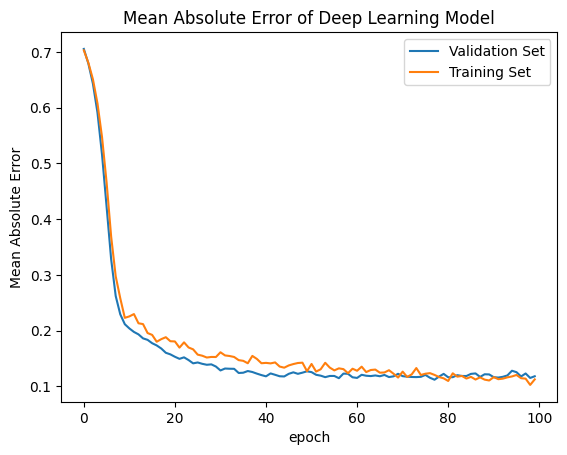

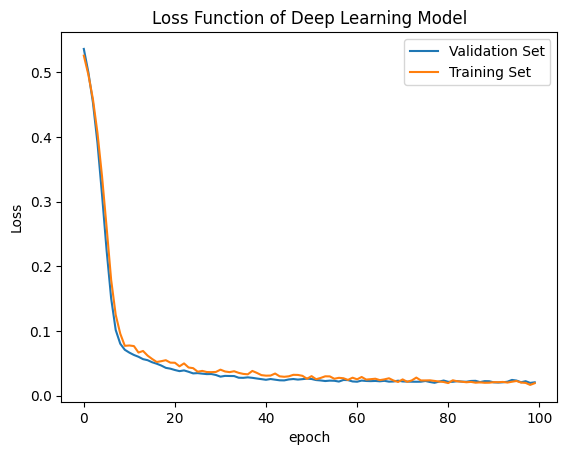

In [40]:
# summarize history for accuracy
plt.plot(history.history['val_mean_absolute_error'])
plt.plot(history.history['mean_absolute_error'])
plt.title('Mean Absolute Error of Deep Learning Model')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.legend(['Validation Set','Training Set',], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Loss Function of Deep Learning Model')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Validation Set','Training Set'], loc='upper right')
plt.show()

### Prediction vs True Values

We will now use the test data to see how our model did in making predictions based off of the train and validation data it was given. Using graph and summary statistics we can see how well the model was able to reflect the given data.

In [41]:
# make a prediction
predict = model.predict([np.array(test_df['transcriptomics'].tolist()),
     np.array(test_df['fingerprint'].tolist())])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [42]:
new_df = pd.DataFrame({
    'Predicted Values': predict["priority"].tolist(),
    'True Values': y_test
})
new_df['Predicted Values'] = new_df['Predicted Values'].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)
sorted_df = new_df.sort_values(by='True Values', ascending=True)  # Change 'ascending' to False for descending order
sorted_df.head()

,Predicted Values,True Values
4,0.432947,0.2959
13,0.340147,0.3021
15,0.548971,0.3230
74,0.497476,0.3567
34,0.371287,0.3596


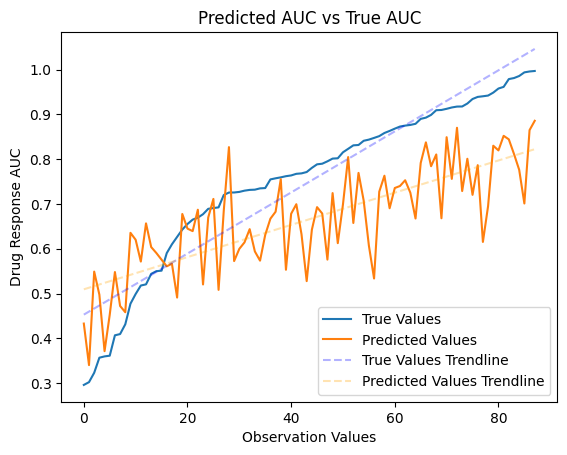

In [43]:
true_values = np.array(sorted_df["True Values"])
predicted_values = np.array(sorted_df["Predicted Values"])

# Plot the true values and predicted values
plt.plot(true_values)
plt.plot(predicted_values)

# Fit trendlines
true_values_trendline = LinearRegression().fit(np.arange(len(true_values)).reshape(-1, 1), true_values.reshape(-1, 1)).predict(np.arange(len(true_values)).reshape(-1, 1))
predicted_values_trendline = LinearRegression().fit(np.arange(len(predicted_values)).reshape(-1, 1), predicted_values.reshape(-1, 1)).predict(np.arange(len(predicted_values)).reshape(-1, 1))

# Plot trendlines
plt.plot(true_values_trendline, linestyle='--', color='blue', alpha=0.3)
plt.plot(predicted_values_trendline, linestyle='--', color='orange', alpha=0.3)

# Customize plot
plt.title('Predicted AUC vs True AUC')
plt.ylabel('Drug Response AUC')
plt.xlabel('Observation Values')
plt.legend(['True Values', 'Predicted Values', 'True Values Trendline', 'Predicted Values Trendline'], loc='lower right')
plt.show()

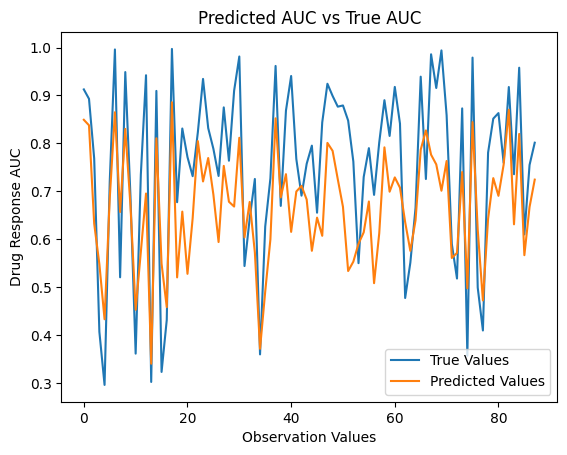

In [44]:
true_values = np.array(new_df["True Values"])
predicted_values = np.array(new_df["Predicted Values"])

# Plot the true values and predicted values
plt.plot(true_values)
plt.plot(predicted_values)

# Fit trendlines
true_values_trendline = LinearRegression().fit(np.arange(len(true_values)).reshape(-1, 1), true_values.reshape(-1, 1)).predict(np.arange(len(true_values)).reshape(-1, 1))
predicted_values_trendline = LinearRegression().fit(np.arange(len(predicted_values)).reshape(-1, 1), predicted_values.reshape(-1, 1)).predict(np.arange(len(predicted_values)).reshape(-1, 1))


# Customize plot
plt.title('Predicted AUC vs True AUC')
plt.ylabel('Drug Response AUC')
plt.xlabel('Observation Values')
plt.legend(['True Values', 'Predicted Values', 'True Values Trendline', 'Predicted Values Trendline'], loc='lower right')
plt.show()

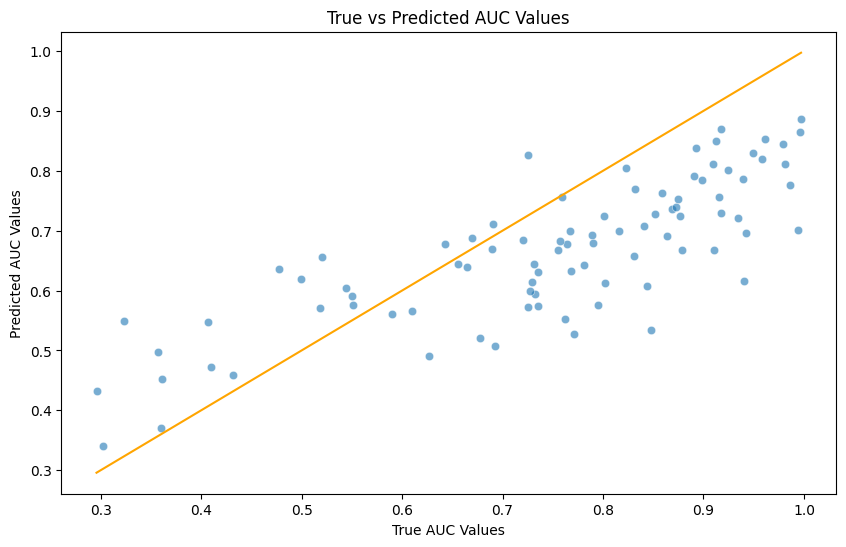

In [45]:
import seaborn as sns

# Visualizing the regression results
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=predicted_values, alpha=0.6)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='orange')
plt.title('True vs Predicted AUC Values')
plt.xlabel('True AUC Values')
plt.ylabel('Predicted AUC Values')
plt.show()

In [46]:
# Calculate Summary Statistics


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(new_df['True Values'], new_df['Predicted Values'])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(new_df['True Values'], new_df['Predicted Values']))

# Calculate R-squared (R2) score
r2 = r2_score(new_df['True Values'], new_df['Predicted Values'])

summary_statistics = new_df.describe()

# Print the statistics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)
print("\n")
# Print summary statistics
print(summary_statistics)


Mean Absolute Error (MAE): 0.12107017955400727
Root Mean Squared Error (RMSE): 0.14044879395085597
R-squared (R2) Score: 0.40249192535799005


       Predicted Values  True Values
count         88.000000    88.000000
mean           0.665929     0.749632
std            0.118047     0.182738
min            0.340147     0.295900
25%            0.586784     0.668400
50%            0.673757     0.776050
75%            0.753646     0.890800
max            0.885833     0.997100


In [47]:
#Side by side comparison for first 50 values.
new_df[0:50].head()

,Predicted Values,True Values
0,0.849208,0.9126
1,0.837691,0.8929
2,0.632486,0.7684
3,0.548004,0.4067
4,0.432947,0.2959
